Download all exons from either the ABCC6 or PMP22 gene from mice.
For that, throw up the Ensembl browser, search for the gene name in mus musculus, click on the first hit (you will see the whole gene now), click on”Sequence” in the menu bar on the left, then “Download” towards the bottom, select “Exons” (only), then “Preview” and finally “Download” as FASTA file. The file should have around 10 KB
Download one more set of exons from the same gene from a different organism. Most organisms have those genes, but not all. I suggest taking an organism that is closely related to mice.
Install any dotplot pgm that you can find (see for example slide 99 (p2 scoring), or the BioConductor repository for R, or BioPython for Python)) – except for “dotPlot” from “seqinr”!
Write a program (R or Python) that reads two fasta files (possibly containing several sequences, like in the case of the suggested genes), connects the sequences into one single sequence each and creates a dotplot for those two, using your installed dotplot pgm.

In [356]:
import sys
from Bio import SeqIO
from Bio.Seq import Seq
from tkinter import *
from tkinter import ttk
import pylab

In [357]:
def concatenate_list_data(list):
    result= ''
    for element in list:
        result += str(element)
    return result

In [358]:
with open('Mus_musculus_Pmp22_sequence.fa') as in_handle_1:
    
    mus_pmp22_tem = []
    
    for Seq_record in SeqIO.parse(in_handle_1,'fasta'):
        
        format_string = "%s" % Seq_record.seq
        mus_pmp22_tem.append(format_string)
        


In [359]:
mus_pmp22_seq = concatenate_list_data(mus_pmp22_tem)

In [360]:
mus_pmp22_seq

'GGAGCCTCCCACTGCCCCCTTGCTTTGCGCGCGCGCTGACCCGCAGCACAGCTGTCTTTGGGGACGCCAGCAACCCAGTGGACGCACCGGAGTTTGTGCCTGAGGCTAATCTGCTCTGAGATAGCTGTCCCTTTGAACTGAAACAGGCACCGCTCCTCTGATCCCGAGCCCAACTCCCAGCCACCATGCTCCTACTCTTGTTGGGGATCCTGTTCCTGCACATCGCGGTGCTAGTGTTGCTCTTCGTCTCCACCATCGTCAGCCAATGGCTCGTGGGCAATGGACACACGACTGATCTCTGGCAGAACTGTACCACATCCGCCTTGGGAGCCGTCCAACACTGCTACTCCTCATCAGTGAGCGAATGGCTGCAGTCTGTCCAGGCCACCATGATCCTGTCTGTCATCTTCAGCGTCCTGGCTCTGTTCCTGTTCTTCTGCCAGCTCTTCACTCTCACCAAAGGCGGCCGGTTTTACATCACTGGATTCTTCCAAATCCTTGCTGGTCTGTGCGTGATGAGTGCAGCGGCCATCTACACAGTGAGGCACAGTGAGTGGCATGTCAACACTGACTACTCCTATGGCTTCGCCTACATCCTGGCCTGGGTGGCCTTTCCCCTAGCCCTCCTCAGTGGTATCATCTATGTGATCCTGCGGAAACGCGAATGAGGCGCCCGACGACGCACCGTCCGTCTAGGCTCTGAGCGCGCATAGGGTCCACAGGGAGGGAGGAAGGAAACCAGAGAACAAAACCAACCAACCAAAAAAGAGCTAGCCCCAAACCCAAACGCAAGCCAAACCAAACAGAACGCAGTTGAGTGGGGATTGCTGTTGATTGAAGATGTATATAATATCTATGGTTTATAAAACCTATTTATAACACTTTTTACATATATGTACATAGGATTGTTTTGCTTTTTATGTTGACCGTCAGCCTCGTGTTGAATCTTAAACAACTTTACATCCTAACACTATAACCAAGCTCAGTATCTTTGTTTTG

In [361]:
len(mus_pmp22_seq)

5466

In [362]:
with open('Homo_sapiens_PMP22_sequence.fa') as in_handle_2:
    
    human_pmp22_tem = []
    
    for Seq_record_1 in SeqIO.parse(in_handle_2,'fasta'):
        
        format_string_1 = "%s" % Seq_record.seq
        human_pmp22_tem.append(format_string_1)


In [363]:
human_pmp22_seq = concatenate_list_data(human_pmp22_tem)

In [364]:
human_pmp22_seq

'GTCTGTGCGTGATGAGTGCAGCGGCCATCTACACAGTGAGGCACAGTGAGTGGCATGTCAACACTGACTACTCCTATGGCTTCGCCTACATCCTGGCCTGGGTGGCCTTTCCCCTAGCCCTCCTCAGTGGTATCATCTATGTGATCCTGCGGAAACGCGAATGAGGCGCCCGACGACGCACCGTCCGTCTAGGCTCTGAGCGCGCATAGGGTCCACAGGGAGGGAGGAAGGAAACCAGAGAACAAAACCAACCAACCAAAAAAGAGCTAGCCCCAAACCCAAACGCAAGCCAAACCAAACAGAACGCAGTTGAGTGTCTGTGCGTGATGAGTGCAGCGGCCATCTACACAGTGAGGCACAGTGAGTGGCATGTCAACACTGACTACTCCTATGGCTTCGCCTACATCCTGGCCTGGGTGGCCTTTCCCCTAGCCCTCCTCAGTGGTATCATCTATGTGATCCTGCGGAAACGCGAATGAGGCGCCCGACGACGCACCGTCCGTCTAGGCTCTGAGCGCGCATAGGGTCCACAGGGAGGGAGGAAGGAAACCAGAGAACAAAACCAACCAACCAAAAAAGAGCTAGCCCCAAACCCAAACGCAAGCCAAACCAAACAGAACGCAGTTGAGTGTCTGTGCGTGATGAGTGCAGCGGCCATCTACACAGTGAGGCACAGTGAGTGGCATGTCAACACTGACTACTCCTATGGCTTCGCCTACATCCTGGCCTGGGTGGCCTTTCCCCTAGCCCTCCTCAGTGGTATCATCTATGTGATCCTGCGGAAACGCGAATGAGGCGCCCGACGACGCACCGTCCGTCTAGGCTCTGAGCGCGCATAGGGTCCACAGGGAGGGAGGAAGGAAACCAGAGAACAAAACCAACCAACCAAAAAAGAGCTAGCCCCAAACCCAAACGCAAGCCAAACCAAACAGAACGCAGTTGAGTGTCTGTGCGTGATGAGTGCAGCGGCCATCTACACAGTGAGGCACAGTGAGTGGC

In [365]:
len(human_pmp22_seq)

16380

In [366]:
window = 15

data = [[(human_pmp22_seq[i:i + window] != mus_pmp22_seq[j:j + window]) \
        for j in range(len(human_pmp22_seq) - window + 1)] \
        for i in range(len(mus_pmp22_seq) - window + 1)]

<Figure size 432x288 with 0 Axes>

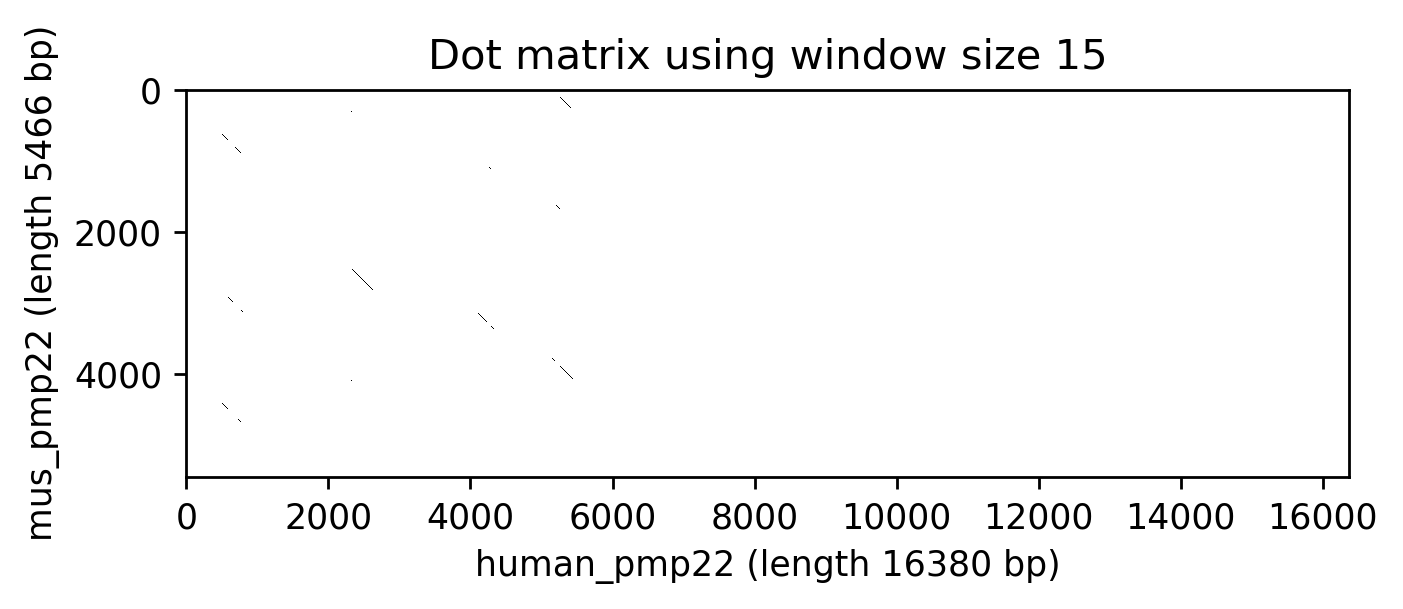

In [367]:
pylab.gray()
pylab.figure(dpi =250)
pylab.imshow(data)
pylab.xlabel("%s (length %i bp)" % ("human_pmp22", len(human_pmp22_seq)))
pylab.ylabel("%s (length %i bp)" % ("mus_pmp22", len(mus_pmp22_seq)))
pylab.title("Dot matrix using window size %i" % window)
pylab.show()

In [368]:
# make a subset with the range [0:5466]
sub_human_pmp22 = human_pmp22_seq[0:5466]

In [369]:
len(sub_human_pmp22)

5466

In [370]:
data_1 = [[(mus_pmp22_seq[i:i + window] != sub_human_pmp22[j:j + window]) \
        for j in range(len(mus_pmp22_seq) - window + 1)] \
        for i in range(len(sub_human_pmp22) - window + 1)]

In [371]:
# Re-draw dotplot (mus_pmp22(x-axis) vs. human_pmp22 (y-axis)) with window 15

# plot1
pylab.gray()
pylab.figure(figsize=(19,19), dpi=500)
pylab.imshow(data_1)
pylab.xlabel("%s (length %i bp)" % ("mus_pmp22", len(mus_pmp22)))
pylab.ylabel("%s (length %i bp)" % ("human_pmp22", len(sub_human_pmp22)))
pylab.title("Dot matrix using window size %i" % window)
pylab.show()

<Figure size 432x288 with 0 Axes>

In [372]:
with open('Capra_hircus_PMP22_sequence.fa') as in_handle_3:
    
    Capra_pmp22_tem = []    
    
    for Seq_record_3 in SeqIO.parse(in_handle_3,'fasta'):
        
        format_string_3 = "%s" % Seq_record_3.seq
        Capra_pmp22_tem.append(format_string_3)
       
        


In [373]:
Capra_pmp22_seq = concatenate_list_data(Capra_pmp22_tem)

In [374]:
len(Capra_pmp22_seq)

2198

In [375]:
sub_mus_pmp22 = mus_pmp22_seq[0:2198]

In [376]:
len(sub_mus_pmp22)

2198

In [377]:
data_2 = [[(sub_mus_pmp22[i:i + window] != Capra_pmp22_seq[j:j + window]) \
        for j in range(len(sub_mus_pmp22) - window + 1)] \
        for i in range(len(Capra_pmp22_seq) - window + 1)]

In [378]:
# Draw dotplot (Capra_hircus_pmp22(y-axis) vs. human_pmp22(x-axis)) with window 15

# plot 2
pylab.gray()
pylab.figure(figsize=(19,19), dpi=500)
pylab.imshow(data_2)
pylab.xlabel("%s (length %i bp)" % ("human_pmp22", len(sub_mus_pmp22)))
pylab.ylabel("%s (length %i bp)" % ("mus_pmp22", len(Capra_pmp22_seq)))
pylab.title("Dot matrix using window size %i" % window)
pylab.show()

<Figure size 432x288 with 0 Axes>

In [379]:
window = 5

data_5 = [[(mus_pmp22_seq[i:i + window] != sub_human_pmp22[j:j + window]) \
        for j in range(len(mus_pmp22_seq) - window + 1)] \
        for i in range(len(sub_human_pmp22) - window + 1)]

In [380]:
# Draw dotplot (mus_pmp22(x-axis) vs. human_pmp22 (y-axis)) with window 5

#plot3
pylab.gray()
pylab.figure(figsize=(19,19), dpi=500)
pylab.imshow(data_5)
pylab.xlabel("%s (length %i bp)" % ("mus_pmp22", len(mus_pmp22_seq)))
pylab.ylabel("%s (length %i bp)" % ("human_pmp22", len(sub_human_pmp22)))
pylab.title("Dot matrix using window size %i" % window)
pylab.show()

<Figure size 432x288 with 0 Axes>

In [381]:
data_6 = [[(sub_mus_pmp22[i:i + window] != Capra_pmp22_seq[j:j + window]) \
        for j in range(len(sub_mus_pmp22) - window + 1)] \
        for i in range(len(Capra_pmp22_seq) - window + 1)]

In [382]:
# Draw dotplot (Capra_hircus_pmp22(y-axis) vs. human_pmp22(x-axis)) with window 5

# Plot 4
pylab.gray()
pylab.figure(figsize=(19,19), dpi=500)
pylab.imshow(data_6)
pylab.xlabel("%s (length %i bp)" % ("human_pmp22", len(sub_mus_pmp22)))
pylab.ylabel("%s (length %i bp)" % ("mus_pmp22", len(Capra_pmp22_seq)))
pylab.title("Dot matrix using window size %i" % window)
pylab.show()

<Figure size 432x288 with 0 Axes>

In this work, four dotplots have been created with three pmp22 exons sequences from three different organisms (mouse, human, and cat).

First of all, the purpose to make a dotplot is for data analysis to scrutinize symbol sequences. Hence, it is a handy visualization tool/method to obtain information between two sequences or multiple sequences and the information could be arrangement recurrences, similarities, and inherent structures.

A key issue to make a dotplot is finding the most suitable/appropriate value of the window which is responsible for the length of frame for each substring. 

For dot plot #1 (mus_pmp22 vs. human_pmp22, windows =15), it has been identified that partial(broken) alignments with frame shits at more than one diagonal region. It means that the identified patterns in the dotplot(1) depending to the other sequence are overlapped. However, all the identified overlapping regions are not located at the diagonal of the dotplot. Hence, deletion, insertion or mutation could be a reason for that. As the difference of genome between the mouse and human is around 85%, it is no surprise with the result of dot plot. From a research to answer this question, the percentage of similarity of genes between the mouse and human is around 99%. 

Because dotplot #3 (mus_pmp22 vs. human_pmp22, windows =5) has no different result compared to the dotplot with windows 15, the previous explanation can be applied for dotplot #3 as well.

for reference: https://www.genome.gov/10001345/importance-of-mouse-genome


For dotplot #2 and dotplot #4, it has been confirmed that the two exon pmp2 sequences between the mouse and cat have high similarity. Especially, the dotplot with window (5) represents a vivid diagonal unbroken straight line which indicates they are homologous sequences and very similar sequences overall.